In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = bagreader('/home/francis/bagfiles/Data/stationary.bag')

[INFO]  Data folder /home/francis/bagfiles/Data/stationary already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gps_data,sensing_and_navigation/utm_msg,612,0.999817


In [4]:
def data_csv(b):
    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)
        
    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data
            

In [5]:
csv_data = data_csv(b)

/home/francis/bagfiles/Data/stationary/gps_data.csv


In [6]:
f = pd.read_csv("/home/francis/bagfiles/Data/stationary/gps_data (copy).csv")

In [7]:
f

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,latitude,longitude,altitude,utm_easting,utm_northing,zone,letter,offset_utm_easting,offset_utm_northing,offset_header.stamp.secs
0,1.580683e+09,5,1580683193,962775945,gps,42.123180,71.033821,10.2,331885.381208,4.665455e+06,19,T,1.381208,0.646795,0
1,1.580683e+09,6,1580683194,986450910,gps,42.123180,71.033821,10.2,331885.381208,4.665455e+06,19,T,1.381208,0.646795,1
2,1.580683e+09,7,1580683195,962483882,gps,42.123180,71.033821,10.2,331885.381208,4.665455e+06,19,T,1.381208,0.646795,2
3,1.580683e+09,8,1580683196,963778018,gps,42.123180,71.033821,10.2,331885.381208,4.665455e+06,19,T,1.381208,0.646795,3
4,1.580683e+09,9,1580683197,988142967,gps,42.123180,71.033821,10.2,331885.381208,4.665455e+06,19,T,1.381208,0.646795,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1.580684e+09,612,1580683801,130160093,gps,42.123183,71.033827,10.5,331884.893164,4.665455e+06,19,T,0.893164,0.991724,608
608,1.580684e+09,613,1580683802,146076917,gps,42.123183,71.033827,10.5,331884.893164,4.665455e+06,19,T,0.893164,0.991724,609
609,1.580684e+09,614,1580683803,188463926,gps,42.123183,71.033827,10.5,331884.893164,4.665455e+06,19,T,0.893164,0.991724,610
610,1.580684e+09,615,1580683804,172852039,gps,42.123183,71.033827,10.5,331884.893164,4.665455e+06,19,T,0.893164,0.991724,611


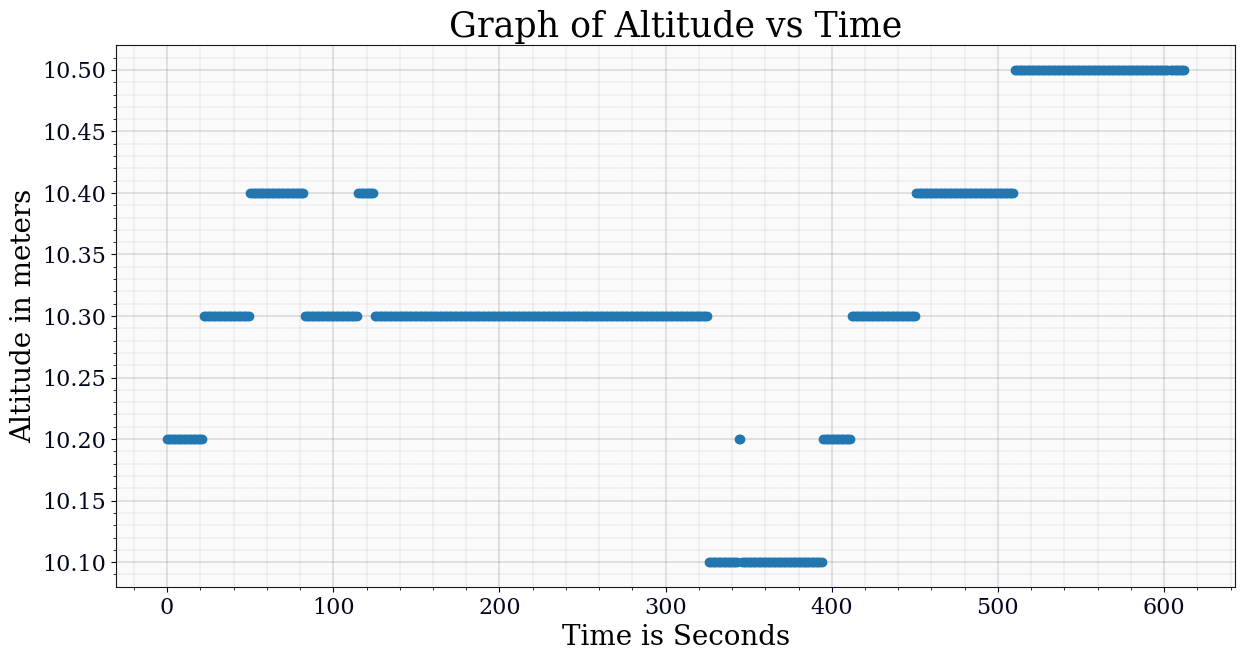

In [11]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x='offset_header.stamp.secs', y='altitude',data=f)
plt.title("Graph of Altitude vs Time")
plt.xlabel("Time is Seconds")
plt.ylabel("Altitude in meters")
plt.show()

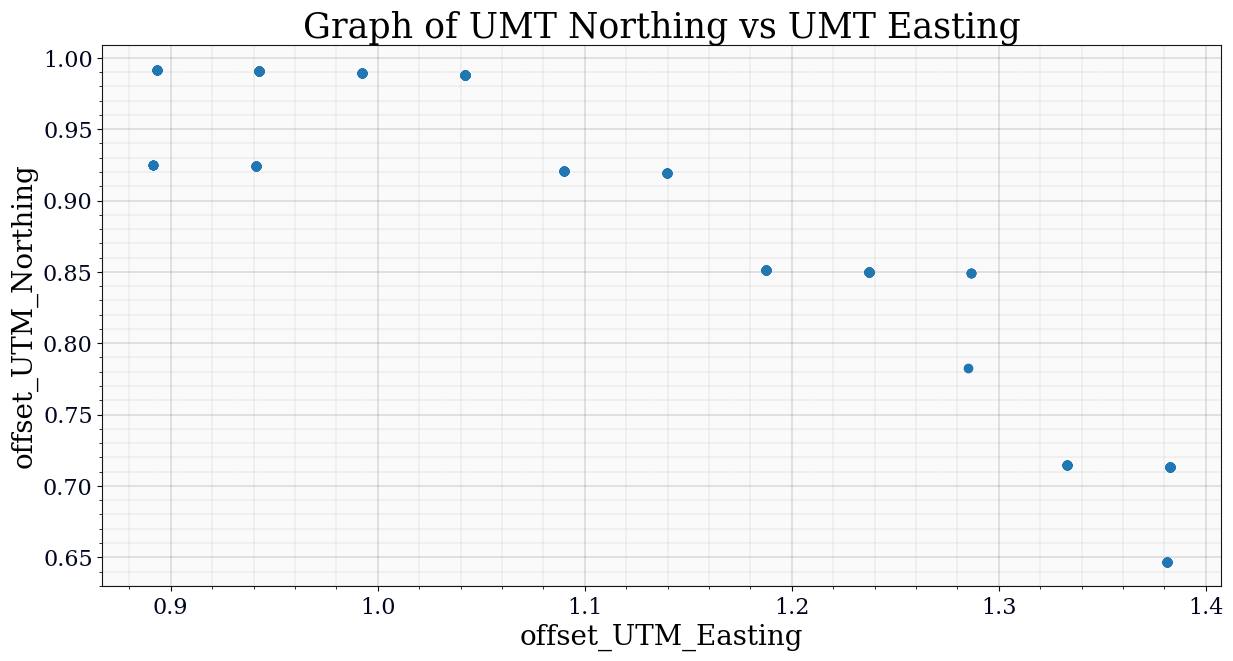

In [12]:
fig, a = bagpy.create_fig(1)
a[0].scatter(x='offset_utm_easting', y='offset_utm_northing',data=f)
plt.title("Graph of UMT Northing vs UMT Easting")
plt.xlabel("offset_UTM_Easting")
plt.ylabel("offset_UTM_Northing")
plt.show()